# Intall Necessary library

In [1]:
import pandas as pd
import numpy as np
import csv
from matplotlib import pyplot as plt
import seaborn as sns 
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objs as go

# Data Read

In [2]:
df=pd.read_csv("Vaccine Uptake.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'District_name', '_v1', '_v2', '_v3', '_v6', '_v7', '_v8',
       '_v9', '_v10', '_v11', '_v12', '_v13', '_v14', '_v15', '_v16', '_v17',
       '_v18', '_v19', '_v20', '_v21', '_v22', '_v23', '_v24', '_v34', '_v35',
       '_v36', '_v37', '_v38', '_v39', '_v40', '_v41', '_v42', '_v43', '_v44',
       '_v45', '_v46', '_v47', '_v48', '_v49', '_v50', '_v51', '_v52', '_v53',
       '_v54', '_v55', '_v56', '_v57', '_v58', '_v59', '_v60', '_v61', '_v71',
       '_v72', 'age_cat', 'income_cat', 'occupation_cat', 'working_status',
       'family_member', 'child_under_2', 'old_above_60', 'earning_person',
       'seeing', 'hearing', 'walking', 'remembering', 'selfcare',
       'communicating', 'using_hand', 'disability'],
      dtype='object')

In [4]:
df.head()

,Unnamed: 0,District_name,_v1,_v2,_v3,_v6,_v7,_v8,_v9,_v10,...,old_above_60,earning_person,seeing,hearing,walking,remembering,selfcare,communicating,using_hand,disability
0,0,1. Habiganj,2. Others,2. Female,35,1. Married,2. Secondary high school (6-10 years),11. Housewife,2. No,2. No,...,0,1,no,no,no,no,no,no,no,1.0
1,1,1. Habiganj,1. Household head,1. Male,42,1. Married,2. Secondary high school (6-10 years),5. Business,NaN,NaN,...,0,1,no,no,no,no,no,no,no,1.0
2,2,1. Habiganj,2. Others,2. Female,30,1. Married,2. Secondary high school (6-10 years),11. Housewife,2. No,2. No,...,0,1,no,no,no,no,no,no,no,1.0
3,3,1. Habiganj,1. Household head,1. Male,55,1. Married,6. No schooling,8. Productive work at household,NaN,NaN,...,0,2,yes,no,no,no,no,no,no,2.0
4,4,1. Habiganj,2. Others,2. Female,45,1. Married,6. No schooling,11. Housewife,2. No,2. No,...,0,2,no,no,no,no,no,no,no,1.0


# EDA

# Data Visulization

In [50]:
%pip install folium

   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ------- ------------------------------- 20.5/100.0 kB 320.0 kB/s eta 0:00:01
   ----------- --------------------------- 30.7/100.0 kB 262.6 kB/s eta 0:00:01
   ------------------- ------------------- 51.2/100.0 kB 372.4 kB/s eta 0:00:01
   -------------------------------------- 100.0/100.0 kB 521.9 kB/s eta 0:00:00


In [56]:
%pip install geopandas


     ---------------------------------------- 0.0/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.5 kB ? eta -:--:--
     ---------------------- --------------- 30.7/51.5 kB 186.2 kB/s eta 0:00:01
     -------------------------------------  51.2/51.5 kB 262.6 kB/s eta 0:00:01
     -------------------------------------- 51.5/51.5 kB 240.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.1 MB 2.3 MB/s eta 0:00:01
   ------ --------------------------------- 0.2/1.1 MB 2.8 MB/s eta 0:00:01
   ---------- ----------------------------- 0.3/1.1 MB 2.6 MB/s eta 0:00:01
   ------------- -------------------------- 0.4/1.1 MB 2.4 MB/s eta 0:00:01
   --------------------- ------------------ 0.6/1.1 MB 2.9 MB/s eta 0:00:01
   -------------------------------- ------- 0.9/1.1 MB 3.3 MB/s eta 0:00:01
   -------------

# Duplicate Column Drop

In [5]:
# List of columns to drop
columns_to_drop = [
    'Unnamed: 0','_v3', '_v8', '_v11', '_v12', '_v13', '_v14', '_v15', '_v16', '_v17', '_v18', '_v19', '_v20', '_v21', '_v22', '_v23',
    '_v34', '_v35', '_v36', '_v37', '_v38', '_v39', '_v40',
    '_v47', '_v48', '_v49', '_v50', '_v51', '_v52', '_v53', '_v54', '_v56',
    '_v57', '_v59', '_v60', '_v71','seeing', 'hearing', 'walking', 'remembering',
       'selfcare', 'communicating', 'using_hand', '_v72','_v42']

# Drop the specified columns in place
df.drop(columns=columns_to_drop, inplace=True)

In [6]:
df.columns

Index(['District_name', '_v1', '_v2', '_v6', '_v7', '_v9', '_v10', '_v24',
       '_v41', '_v43', '_v44', '_v45', '_v46', '_v55', '_v58', '_v61',
       'age_cat', 'income_cat', 'occupation_cat', 'working_status',
       'family_member', 'child_under_2', 'old_above_60', 'earning_person',
       'disability'],
      dtype='object')

# Outliers

# Null Value Handling

In [7]:
# Columns with missing values
columns_with_missing = ['_v43']

# Fill missing values with mode
for col in columns_with_missing:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

print(df)

     District_name                _v1        _v2                      _v6  \
0      1. Habiganj          2. Others  2. Female               1. Married   
1      1. Habiganj  1. Household head    1. Male               1. Married   
2      1. Habiganj          2. Others  2. Female               1. Married   
3      1. Habiganj  1. Household head    1. Male               1. Married   
4      1. Habiganj          2. Others  2. Female               1. Married   
...            ...                ...        ...                      ...   
5386    2. Tangail  1. Household head    1. Male               1. Married   
5387    2. Tangail          2. Others  2. Female               1. Married   
5388    2. Tangail  1. Household head    1. Male               1. Married   
5389    2. Tangail  1. Household head  2. Female               3. Widowed   
5390    2. Tangail  1. Household head  2. Female  4. Divorced / Seperated   

                                        _v7    _v9   _v10    _v24    _v41  

In [8]:
# Step 1: Get the count of missing values for each column
missing_values = df.isna().sum()

# Step 2: Filter columns that have missing values
missing_columns = missing_values[missing_values > 0]

print("Columns with missing values:")
print(missing_columns)

Columns with missing values:
_v9     3610
_v10    3617
_v58     153
_v61     153
dtype: int64


Women Category 

In [9]:
columns_to_drop = ['_v9', '_v10']

# Drop the specified columns in place
df.drop(columns=columns_to_drop, inplace=True)

In [10]:
# Check the initial number of rows
print(f"Initial number of rows: {df.shape[0]}")

# Drop rows where _v61 has null values and their related rows in other columns
df = df.dropna(subset=['_v61'])

# Verify the result
print(f"Number of rows after dropping nulls in _v61 and related rows in other columns: {df.shape[0]}")
print(df.head())

Initial number of rows: 5391
Number of rows after dropping nulls in _v61 and related rows in other columns: 5238
  District_name                _v1        _v2         _v6  \
0   1. Habiganj          2. Others  2. Female  1. Married   
1   1. Habiganj  1. Household head    1. Male  1. Married   
2   1. Habiganj          2. Others  2. Female  1. Married   
3   1. Habiganj  1. Household head    1. Male  1. Married   
4   1. Habiganj          2. Others  2. Female  1. Married   

                                     _v7    _v24    _v41    _v43    _v44  \
0  2. Secondary high school (6-10 years)   2. No   2. No  1. Yes  1. Yes   
1  2. Secondary high school (6-10 years)  1. Yes  1. Yes   2. No  1. Yes   
2  2. Secondary high school (6-10 years)   2. No   2. No  1. Yes  1. Yes   
3                        6. No schooling  1. Yes   2. No   2. No  1. Yes   
4                        6. No schooling  1. Yes   2. No   2. No  1. Yes   

     _v45  ...    _v61         age_cat      income_cat  occupat

In [11]:
df.head()

,District_name,_v1,_v2,_v6,_v7,_v24,_v41,_v43,_v44,_v45,...,_v61,age_cat,income_cat,occupation_cat,working_status,family_member,child_under_2,old_above_60,earning_person,disability
0,1. Habiganj,2. Others,2. Female,1. Married,2. Secondary high school (6-10 years),2. No,2. No,1. Yes,1. Yes,1. Yes,...,1. Yes,3. 30-39 years,2. 10000-19000,7. Housewife,not working,4 and above,0,0,1,1.0
1,1. Habiganj,1. Household head,1. Male,1. Married,2. Secondary high school (6-10 years),1. Yes,1. Yes,2. No,1. Yes,1. Yes,...,1. Yes,4. 40-49 years,2. 10000-19000,2. Business,working,4 and above,0,0,1,1.0
2,1. Habiganj,2. Others,2. Female,1. Married,2. Secondary high school (6-10 years),2. No,2. No,1. Yes,1. Yes,1. Yes,...,1. Yes,3. 30-39 years,2. 10000-19000,7. Housewife,not working,4 and above,0,0,1,1.0
3,1. Habiganj,1. Household head,1. Male,1. Married,6. No schooling,1. Yes,2. No,2. No,1. Yes,1. Yes,...,1. Yes,5. 50-59 years,1. <10000,1. agriculture,working,1-3,0,0,2,2.0
4,1. Habiganj,2. Others,2. Female,1. Married,6. No schooling,1. Yes,2. No,2. No,1. Yes,1. Yes,...,1. Yes,4. 40-49 years,1. <10000,7. Housewife,not working,1-3,0,0,2,1.0


In [12]:
# Find the shape of the dataset
dataset_shape = df.shape

# Print the shape
print("Shape of the dataset:", dataset_shape)

Shape of the dataset: (5238, 23)


In [13]:
# Step 1: Get the count of missing values for each column
missing_values = df.isna().sum()

# Step 2: Filter columns that have missing values
missing_columns = missing_values[missing_values > 0]

print("Columns with missing values:")
print(missing_columns)

Columns with missing values:
Series([], dtype: int64)


# Handling categorical Values

In [14]:
# Step 1: Check the unique values in _v58
print("Unique values in _v58 column before processing:", df['_v58'].unique())

# Step 3: Define the function to convert doses to binary target
def dose_to_binary(dose):
    if dose in ['3. Three or more doses', '2. Two doses']:
        return 1  # Completed doses
    else:
        return 0  # Incompleted doses

# Step 4: Apply the function to the _v58 column to update it in place
df['_v58'] = df['_v58'].apply(dose_to_binary)

# Step 5: Verify the conversion
print(df[['_v58']].head())
print("Unique values in _v58 column after processing:", df['_v58'].unique())

# Step 6: Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print("Unique values in", column, "column:", df[column].unique())


Unique values in _v58 column before processing: ['3. Three or more doses' '2. Two doses' '1. One dose']
   _v58
0     1
1     1
2     1
3     1
4     1
Unique values in _v58 column after processing: [1 0]
Unique values in District_name column: ['1. Habiganj' '5. Bagerhat' '3. Bagura' '4. Natore' '2. Tangail']
Unique values in _v1 column: ['2. Others' '1. Household head']
Unique values in _v2 column: ['2. Female' '1. Male']
Unique values in _v6 column: ['1. Married' '2. Unmarried' '3. Widowed' '4. Divorced / Seperated']
Unique values in _v7 column: ['2. Secondary high school (6-10 years)' '6. No schooling'
 '4. University or higher (>12 years)' '3. Higher secondary (11-12 years)'
 '1. Primary (1-5 years)' '5. Madrasa']
Unique values in _v24 column: ['2. No' '1. Yes']
Unique values in _v41 column: ['2. No' '1. Yes' "3. Don't know / Never tested"]
Unique values in _v43 column: ['1. Yes' '2. No' "3. Don't know / Never tested"]
Unique values in _v44 column: ['1. Yes' '2. No']
Unique values 

In [15]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['District_name', '_v1', '_v2', '_v6', '_v7', '_v24', '_v41', '_v43',
       '_v44', '_v45', '_v46', '_v55', '_v61', 'age_cat', 'income_cat',
       'occupation_cat', 'working_status', 'family_member', 'child_under_2',
       'old_above_60', 'earning_person'],
      dtype='object')


In [16]:
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"{col}: {unique_values}")

District_name: ['1. Habiganj' '5. Bagerhat' '3. Bagura' '4. Natore' '2. Tangail']
_v1: ['2. Others' '1. Household head']
_v2: ['2. Female' '1. Male']
_v6: ['1. Married' '2. Unmarried' '3. Widowed' '4. Divorced / Seperated']
_v7: ['2. Secondary high school (6-10 years)' '6. No schooling'
 '4. University or higher (>12 years)' '3. Higher secondary (11-12 years)'
 '1. Primary (1-5 years)' '5. Madrasa']
_v24: ['2. No' '1. Yes']
_v41: ['2. No' '1. Yes' "3. Don't know / Never tested"]
_v43: ['1. Yes' '2. No' "3. Don't know / Never tested"]
_v44: ['1. Yes' '2. No']
_v45: ['1. Yes' '2. No']
_v46: ['1. Yes' '2. No' "3. Don't know"]
_v55: ['2. No' "3. Don't know" '1. Yes']
_v61: ['1. Yes' '2. No']
age_cat: ['3. 30-39 years' '4. 40-49 years' '5. 50-59 years' '2. 20-29 years'
 '6. 60-69 years' '7. 70 years and above' '1. <20 years']
income_cat: ['2. 10000-19000' '1. <10000' '4. 30000 and above' '3. 20000-29000']
occupation_cat: ['7. Housewife' '2. Business' '1. agriculture' '4. professional'
 '6. 

In [17]:
%pip install category_encoders

In [18]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

# Define the columns for each encoding type
ordinal_encode_columns = ['_v7', 'family_member', 'child_under_2', 'old_above_60', 'earning_person', 'age_cat', 'income_cat']
binary_encode_columns = ['_v1', '_v2', '_v24', '_v44', '_v45', '_v61', 'working_status','disability']
one_hot_encode_columns = ['occupation_cat','_v6']
frequency_encode_column = 'District_name'



# Apply Ordinal Encoding
ordinal_encoders = {}
for column in ordinal_encode_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    ordinal_encoders[column] = le

# Apply Binary Encoding for label_encode_columns
binary_encoder = ce.BinaryEncoder(cols=binary_encode_columns)
df = binary_encoder.fit_transform(df)

# Apply One-Hot Encoding for occupation_cat
df = pd.get_dummies(df, columns=one_hot_encode_columns)
df = pd.get_dummies(df, columns=['_v41', '_v43', '_v46', '_v55'])

# Apply Frequency Encoding for District_name
frequency_encoding = df[frequency_encode_column].value_counts() / len(df)
df[frequency_encode_column] = df[frequency_encode_column].map(frequency_encoding)

# Display the first few rows of the dataframe
print(df.head())

   District_name  _v1_0  _v1_1  _v2_0  _v2_1  _v7  _v24_0  _v24_1  _v44_0  \
0       0.216877      0      1      0      1    1       0       1       0   
1       0.216877      1      0      1      0    1       1       0       0   
2       0.216877      0      1      0      1    1       0       1       0   
3       0.216877      1      0      1      0    5       1       0       0   
4       0.216877      0      1      0      1    5       1       0       0   

   _v44_1  ...  _v41_3. Don't know / Never tested  _v43_1. Yes  _v43_2. No  \
0       1  ...                              False         True       False   
1       1  ...                              False        False        True   
2       1  ...                              False         True       False   
3       1  ...                              False        False        True   
4       1  ...                              False        False        True   

   _v43_3. Don't know / Never tested  _v46_1. Yes  _v46_2. No  \
0  

In [19]:
# Create a DataFrame with a single column containing column names
column_names_df = pd.DataFrame({'column_names': df.columns})

# Print the DataFrame to see the column names
print(column_names_df)

                         column_names
0                       District_name
1                               _v1_0
2                               _v1_1
3                               _v2_0
4                               _v2_1
5                                 _v7
6                              _v24_0
7                              _v24_1
8                              _v44_0
9                              _v44_1
10                             _v45_0
11                             _v45_1
12                               _v58
13                             _v61_0
14                             _v61_1
15                            age_cat
16                         income_cat
17                   working_status_0
18                   working_status_1
19                      family_member
20                      child_under_2
21                       old_above_60
22                     earning_person
23                       disability_0
24                       disability_1
25      occu

In [20]:
df.head()

,District_name,_v1_0,_v1_1,_v2_0,_v2_1,_v7,_v24_0,_v24_1,_v44_0,_v44_1,...,_v41_3. Don't know / Never tested,_v43_1. Yes,_v43_2. No,_v43_3. Don't know / Never tested,_v46_1. Yes,_v46_2. No,_v46_3. Don't know,_v55_1. Yes,_v55_2. No,_v55_3. Don't know
0,0.216877,0,1,0,1,1,0,1,0,1,...,False,True,False,False,True,False,False,False,True,False
1,0.216877,1,0,1,0,1,1,0,0,1,...,False,False,True,False,True,False,False,False,True,False
2,0.216877,0,1,0,1,1,0,1,0,1,...,False,True,False,False,True,False,False,False,True,False
3,0.216877,1,0,1,0,5,1,0,0,1,...,False,False,True,False,True,False,False,False,True,False
4,0.216877,0,1,0,1,5,1,0,0,1,...,False,False,True,False,True,False,False,False,True,False


In [21]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index([], dtype='object')


In [22]:
missing_values = df.isna().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
District_name                        0
_v1_0                                0
_v1_1                                0
_v2_0                                0
_v2_1                                0
_v7                                  0
_v24_0                               0
_v24_1                               0
_v44_0                               0
_v44_1                               0
_v45_0                               0
_v45_1                               0
_v58                                 0
_v61_0                               0
_v61_1                               0
age_cat                              0
income_cat                           0
working_status_0                     0
working_status_1                     0
family_member                        0
child_under_2                        0
old_above_60                         0
earning_person                       0
disability_0                         0
disability_1                     

# Dataset Split

In [23]:
df.dropna(inplace = True)
print(df.shape)

(5238, 50)


In [24]:
# Separate the independent (X) and dependent (y) features
X = df.drop(columns = '_v58')
y = df['_v58']

In [25]:
X.head()

,District_name,_v1_0,_v1_1,_v2_0,_v2_1,_v7,_v24_0,_v24_1,_v44_0,_v44_1,...,_v41_3. Don't know / Never tested,_v43_1. Yes,_v43_2. No,_v43_3. Don't know / Never tested,_v46_1. Yes,_v46_2. No,_v46_3. Don't know,_v55_1. Yes,_v55_2. No,_v55_3. Don't know
0,0.216877,0,1,0,1,1,0,1,0,1,...,False,True,False,False,True,False,False,False,True,False
1,0.216877,1,0,1,0,1,1,0,0,1,...,False,False,True,False,True,False,False,False,True,False
2,0.216877,0,1,0,1,1,0,1,0,1,...,False,True,False,False,True,False,False,False,True,False
3,0.216877,1,0,1,0,5,1,0,0,1,...,False,False,True,False,True,False,False,False,True,False
4,0.216877,0,1,0,1,5,1,0,0,1,...,False,False,True,False,True,False,False,False,True,False


In [26]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: _v58, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [28]:
corr = X_train.corr()
corr

,District_name,_v1_0,_v1_1,_v2_0,_v2_1,_v7,_v24_0,_v24_1,_v44_0,_v44_1,...,_v41_3. Don't know / Never tested,_v43_1. Yes,_v43_2. No,_v43_3. Don't know / Never tested,_v46_1. Yes,_v46_2. No,_v46_3. Don't know,_v55_1. Yes,_v55_2. No,_v55_3. Don't know
District_name,1.000000,-0.046646,0.046646,-0.008367,0.008367,0.064867,0.028752,-0.028752,-0.009799,0.009799,...,-0.112933,0.065961,0.093721,-0.122792,-0.002042,0.025679,-0.009535,-0.184112,0.118157,0.123079
_v1_0,-0.046646,1.000000,-1.000000,0.634175,-0.634175,0.094499,0.071024,-0.071024,-0.012630,0.012630,...,-0.011586,-0.010934,0.014839,-0.011378,0.006760,-0.004121,-0.005451,0.010902,-0.018961,0.010212
_v1_1,0.046646,-1.000000,1.000000,-0.634175,0.634175,-0.094499,-0.071024,0.071024,0.012630,-0.012630,...,0.011586,0.010934,-0.014839,0.011378,-0.006760,0.004121,0.005451,-0.010902,0.018961,-0.010212
_v2_0,-0.008367,0.634175,-0.634175,1.000000,-1.000000,-0.001361,-0.069856,0.069856,0.007128,-0.007128,...,0.000932,-0.009078,0.005349,-0.002163,0.032511,0.018688,-0.043837,-0.007543,0.006895,0.002038
_v2_1,0.008367,-0.634175,0.634175,-1.000000,1.000000,0.001361,0.069856,-0.069856,-0.007128,0.007128,...,-0.000932,0.009078,-0.005349,0.002163,-0.032511,-0.018688,0.043837,0.007543,-0.006895,-0.002038
_v7,0.064867,0.094499,-0.094499,-0.001361,0.001361,1.000000,0.074333,-0.074333,-0.008622,0.008622,...,-0.018506,-0.003107,0.022102,-0.021917,-0.007204,0.015871,0.000557,-0.064321,0.019399,0.075001
_v24_0,0.028752,0.071024,-0.071024,-0.069856,0.069856,0.074333,1.000000,-1.000000,-0.004283,0.004283,...,-0.043711,0.033090,0.034157,-0.048166,-0.059427,-0.006822,0.067620,-0.012947,-0.002709,0.024771
_v24_1,-0.028752,-0.071024,0.071024,0.069856,-0.069856,-0.074333,-1.000000,1.000000,0.004283,-0.004283,...,0.043711,-0.033090,-0.034157,0.048166,0.059427,0.006822,-0.067620,0.012947,0.002709,-0.024771
_v44_0,-0.009799,-0.012630,0.012630,0.007128,-0.007128,-0.008622,-0.004283,0.004283,1.000000,-1.000000,...,0.020872,-0.005063,-0.017741,0.020443,-0.086564,0.111230,0.043052,-0.018248,0.011871,0.011965
_v44_1,0.009799,0.012630,-0.012630,-0.007128,0.007128,0.008622,0.004283,-0.004283,-1.000000,1.000000,...,-0.020872,0.005063,0.017741,-0.020443,0.086564,-0.111230,-0.043052,0.018248,-0.011871,-0.011965


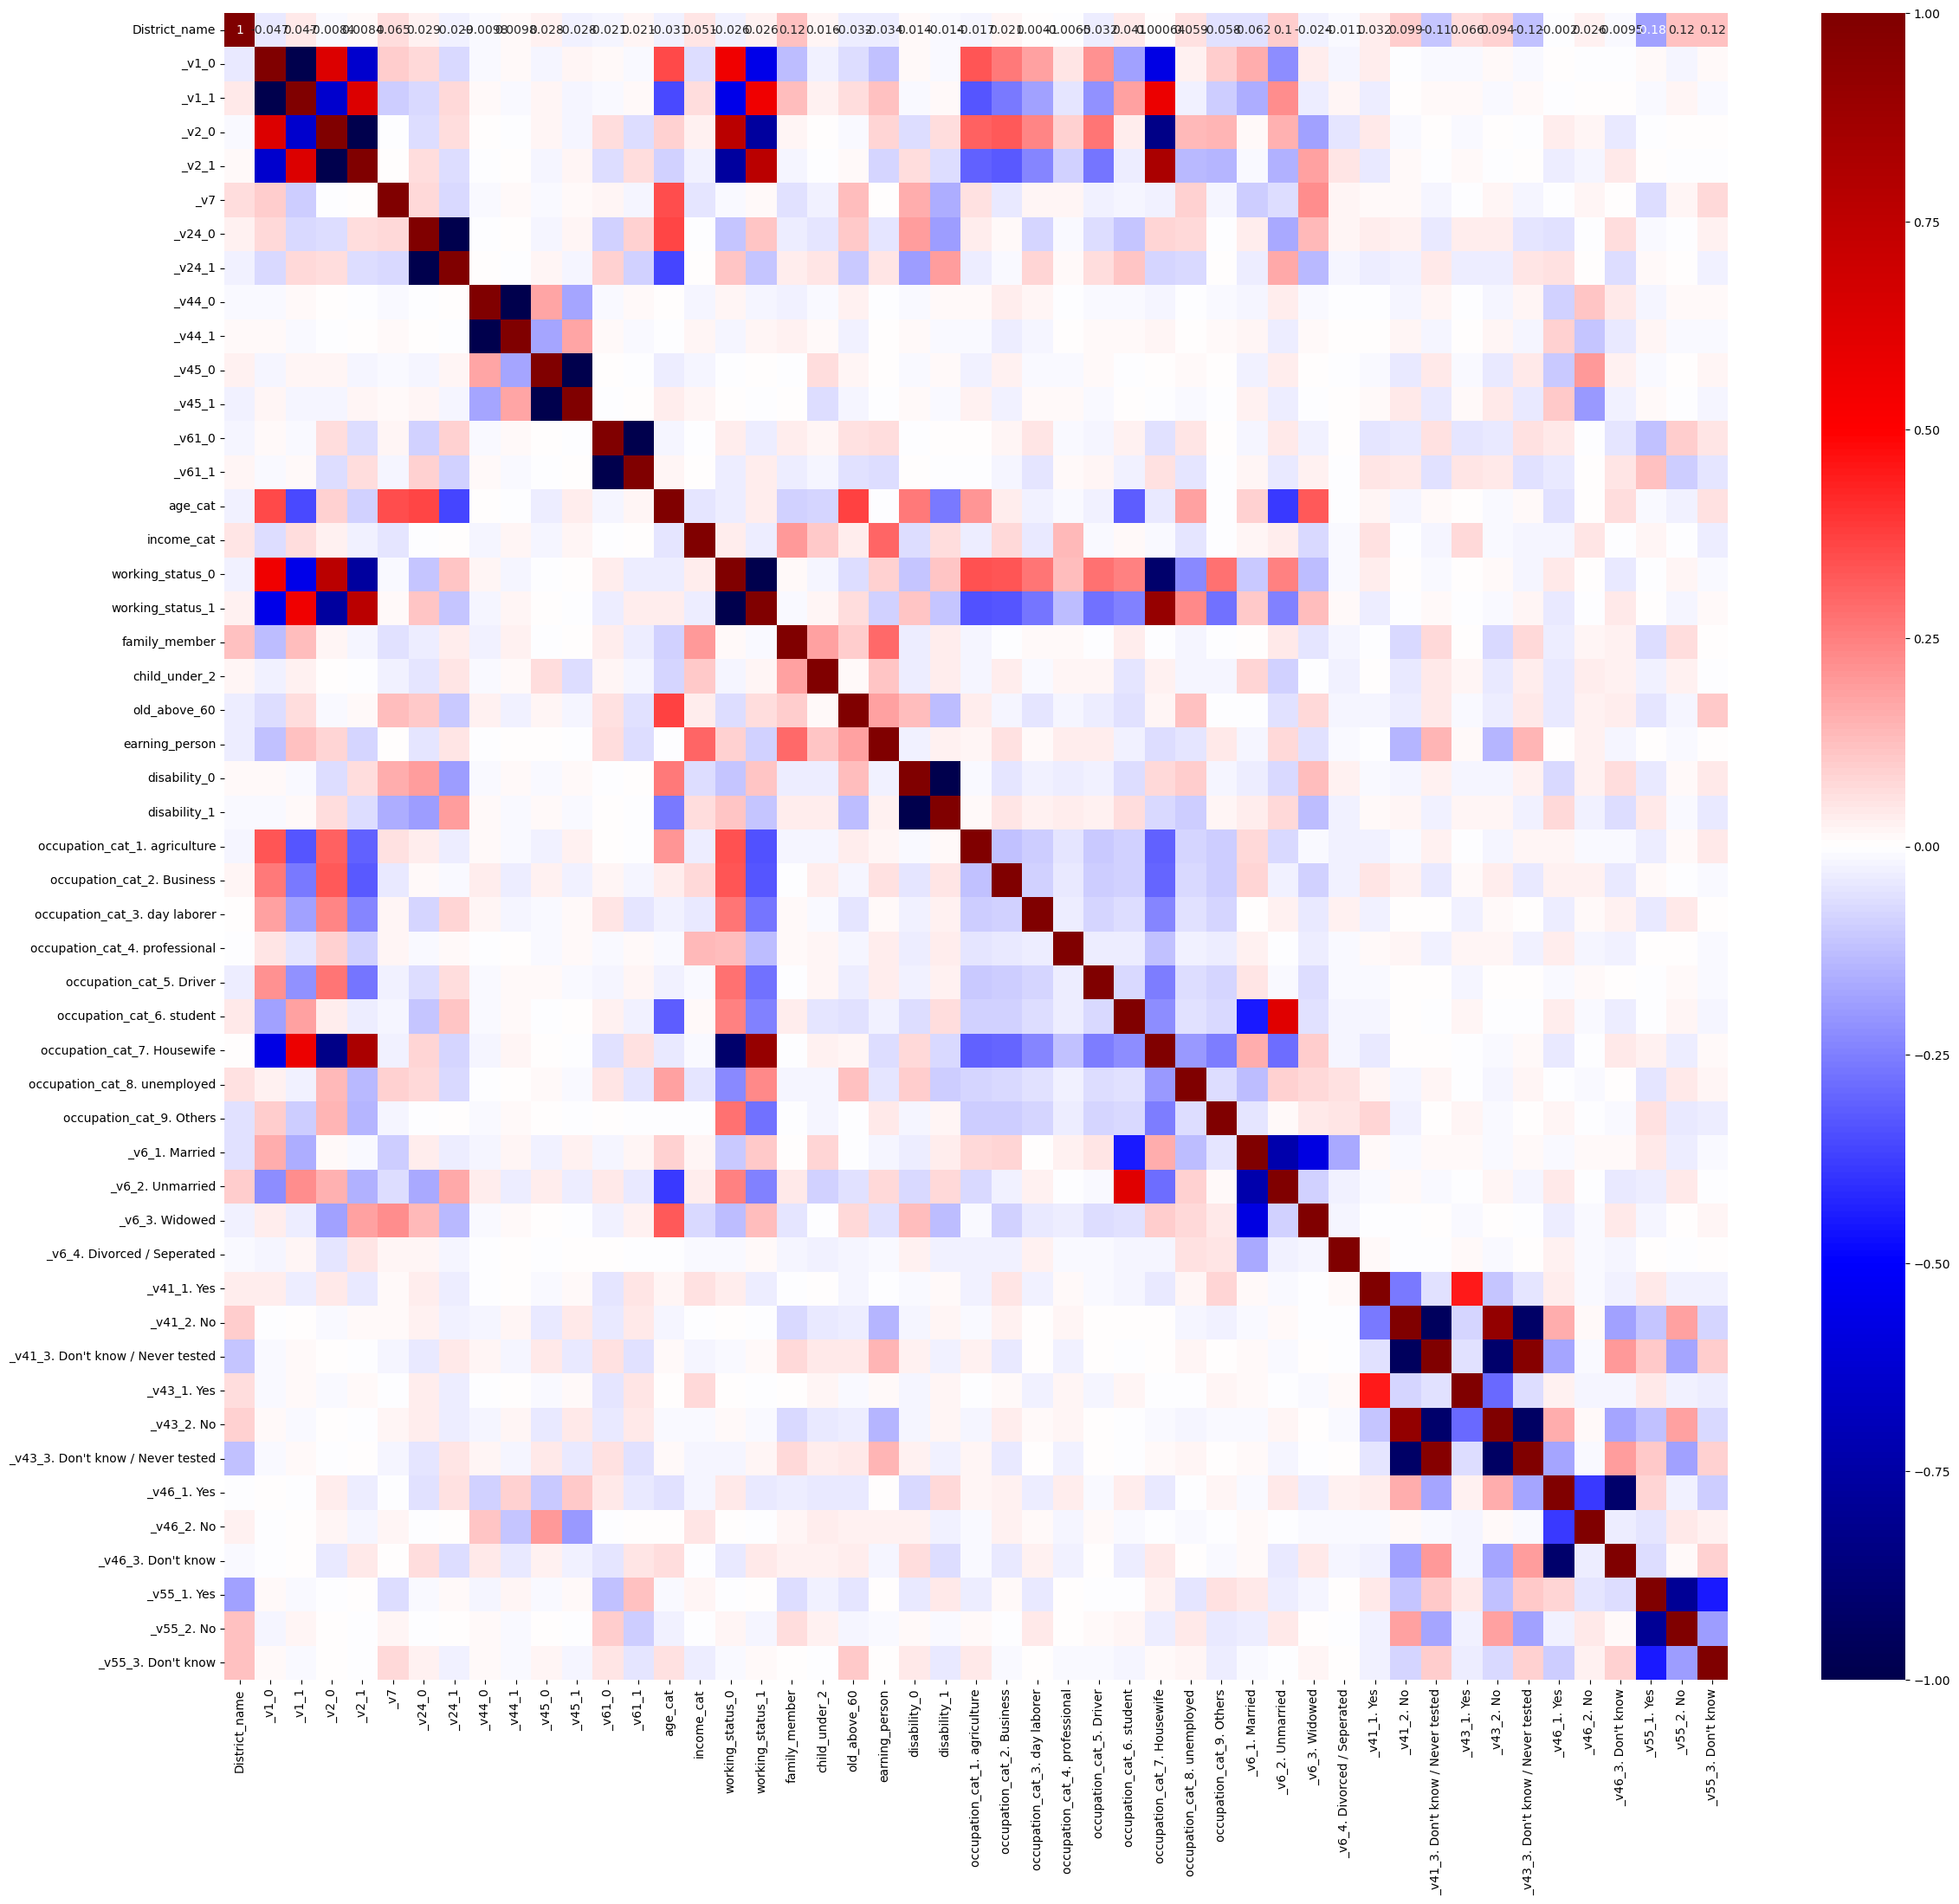

In [29]:
plt.figure(figsize = (28,25))
sns.heatmap(corr, annot = True, cmap = "seismic");

# Normalization

In [30]:
# Iterate over columns and print unique values
for column in X_train.columns:
    print("Unique values in", column, "column:", X_train[column].unique())


Unique values in District_name column: [0.18556701 0.21687667 0.1914853  0.20656739 0.19950363]
Unique values in _v1_0 column: [0 1]
Unique values in _v1_1 column: [1 0]
Unique values in _v2_0 column: [1 0]
Unique values in _v2_1 column: [0 1]
Unique values in _v7 column: [2 0 5 1 3 4]
Unique values in _v24_0 column: [0 1]
Unique values in _v24_1 column: [1 0]
Unique values in _v44_0 column: [0 1]
Unique values in _v44_1 column: [1 0]
Unique values in _v45_0 column: [0 1]
Unique values in _v45_1 column: [1 0]
Unique values in _v61_0 column: [1 0]
Unique values in _v61_1 column: [0 1]
Unique values in age_cat column: [5 6 2 4 1 3 0]
Unique values in income_cat column: [3 1 0 2]
Unique values in working_status_0 column: [1 0]
Unique values in working_status_1 column: [0 1]
Unique values in family_member column: [1 0]
Unique values in child_under_2 column: [0 1 2]
Unique values in old_above_60 column: [1 2 0]
Unique values in earning_person column: [2 1 3 0]
Unique values in disability_0 

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Identify columns with values outside the 0-1 range (based on your description)
columns_to_normalize = ['_v7', 'age_cat', 'income_cat', 'child_under_2', 'old_above_60', 'earning_person']

# Print the identified columns
print("Columns to be normalized:", columns_to_normalize)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform only the identified columns
X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])

# Display the first few rows of the scaled dataframe
print(X_train.head())

Columns to be normalized: ['_v7', 'age_cat', 'income_cat', 'child_under_2', 'old_above_60', 'earning_person']
      District_name  _v1_0  _v1_1  _v2_0  _v2_1  _v7  _v24_0  _v24_1  _v44_0  \
2778       0.185567      0      1      1      0  0.4       0       1       0   
248        0.216877      1      0      1      0  0.0       1       0       0   
2874       0.185567      1      0      1      0  0.0       1       0       0   
2654       0.185567      1      0      0      1  1.0       0       1       0   
1510       0.191485      0      1      0      1  0.2       0       1       0   

      _v44_1  ...  _v41_3. Don't know / Never tested  _v43_1. Yes  _v43_2. No  \
2778       1  ...                              False        False        True   
248        1  ...                              False        False        True   
2874       1  ...                              False        False        True   
2654       1  ...                              False        False        True   
1510

In [32]:
import numpy as np

# Summary statistics
print("Minimum:", np.min(X_train))
print("Maximum:", np.max(X_train))
print("Mean:", np.mean(X_train))
print("Standard Deviation:", np.std(X_train))


Minimum: 0
Maximum: 1
Mean: 0.345964930447531
Standard Deviation: District_name                        0.011022
_v1_0                                0.484657
_v1_1                                0.484657
_v2_0                                0.499990
_v2_1                                0.499990
_v7                                  0.400342
_v24_0                               0.435263
_v24_1                               0.435263
_v44_0                               0.034524
_v44_1                               0.034524
_v45_0                               0.077013
_v45_1                               0.077013
_v61_0                               0.487034
_v61_1                               0.487034
age_cat                              0.265209
income_cat                           0.299258
working_status_0                     0.499752
working_status_1                     0.499752
family_member                        0.452974
child_under_2                        0.211105
old_above_60  

In [33]:
# Iterate over columns and print unique values
for column in X_train.columns:
    print("Unique values in", column, "column:", X_train[column].unique())


Unique values in District_name column: [0.18556701 0.21687667 0.1914853  0.20656739 0.19950363]
Unique values in _v1_0 column: [0 1]
Unique values in _v1_1 column: [1 0]
Unique values in _v2_0 column: [1 0]
Unique values in _v2_1 column: [0 1]
Unique values in _v7 column: [0.4 0.  1.  0.2 0.6 0.8]
Unique values in _v24_0 column: [0 1]
Unique values in _v24_1 column: [1 0]
Unique values in _v44_0 column: [0 1]
Unique values in _v44_1 column: [1 0]
Unique values in _v45_0 column: [0 1]
Unique values in _v45_1 column: [1 0]
Unique values in _v61_0 column: [1 0]
Unique values in _v61_1 column: [0 1]
Unique values in age_cat column: [0.83333333 1.         0.33333333 0.66666667 0.16666667 0.5
 0.        ]
Unique values in income_cat column: [1.         0.33333333 0.         0.66666667]
Unique values in working_status_0 column: [1 0]
Unique values in working_status_1 column: [0 1]
Unique values in family_member column: [1 0]
Unique values in child_under_2 column: [0.  0.5 1. ]
Unique values i

# Imbalance Data Handling

In [34]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [35]:
from imblearn.over_sampling import RandomOverSampler

# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Perform random oversampling
X_train, y_train = ros.fit_resample(X_train, y_train)

# Classication Model


Logistic Regression:
Accuracy: 0.9312977099236641
Precision: 0.9592850049652433
Recall: 0.9689067201604814
F1 Score: 0.964071856287425
AUC-ROC: 0.6721340492064428
Confusion Matrix:
 [[ 10  41]
 [ 31 966]]

Decision Tree:
Accuracy: 0.9370229007633588
Precision: 0.9515033947623667
Recall: 0.9839518555667001
F1 Score: 0.9674556213017752
AUC-ROC: 0.5017798493519775
Confusion Matrix:
 [[  1  50]
 [ 16 981]]

Random Forest:
Accuracy: 0.9513358778625954
Precision: 0.9513358778625954
Recall: 1.0
F1 Score: 0.9750611246943766
AUC-ROC: 0.5962495329124629
Confusion Matrix:
 [[  0  51]
 [  0 997]]

SVM:
Accuracy: 0.7480916030534351
Precision: 0.9621689785624212
Recall: 0.765295887662989
F1 Score: 0.852513966480447
AUC-ROC: 0.5652447538694515
Confusion Matrix:
 [[ 21  30]
 [234 763]]

Naive Bayes:
Accuracy: 0.07729007633587787
Precision: 0.96875
Recall: 0.031093279839518557
F1 Score: 0.06025267249757046
AUC-ROC: 0.6410702696324266
Confusion Matrix:
 [[ 50   1]
 [966  31]]

K-Nearest Neighbors:
Accu

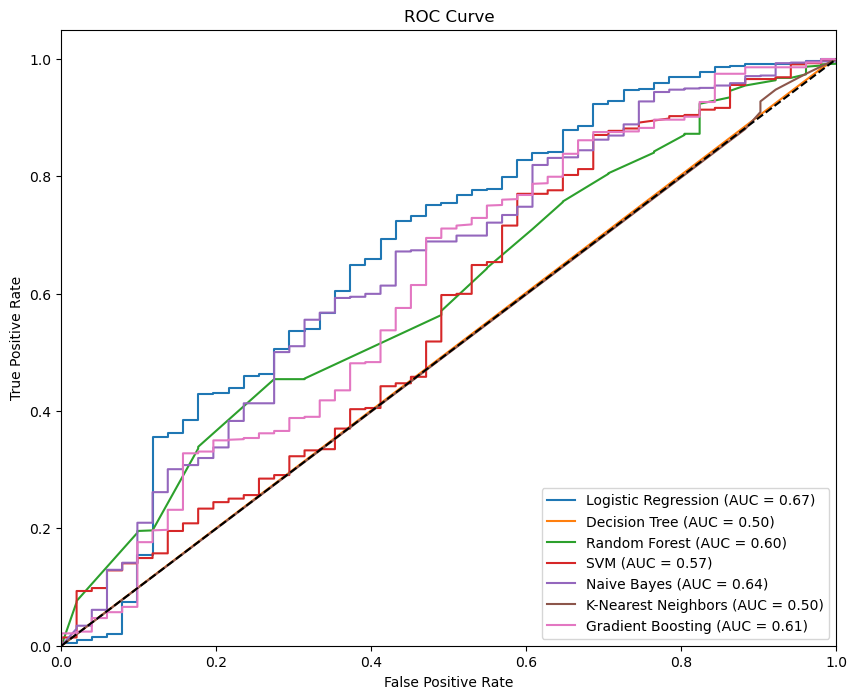

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Function to print model evaluation metrics
def print_metrics(y_test, y_pred, y_pred_proba, model_name):
    print(f"\n{model_name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Function to plot ROC curve
def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')

# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Plotting setup
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Predict probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    # Print metrics
    print_metrics(y_test, y_pred, y_pred_proba, model_name)
    # Plot ROC curve
    plot_roc_curve(y_test, y_pred_proba, model_name)

# Finalize ROC curve plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Important Features

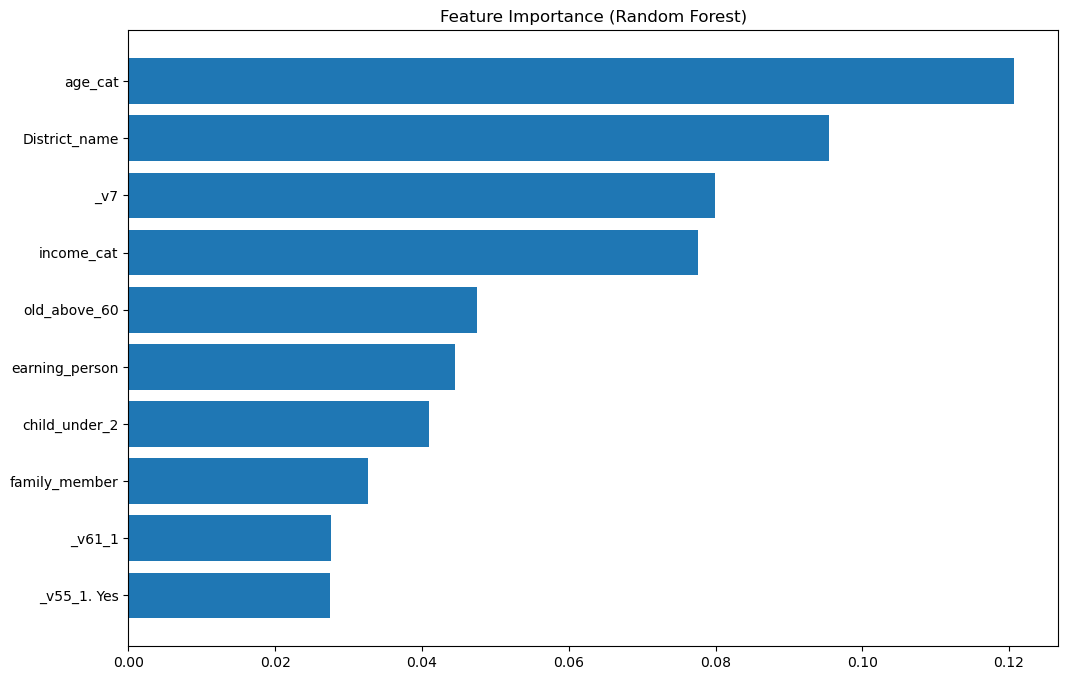

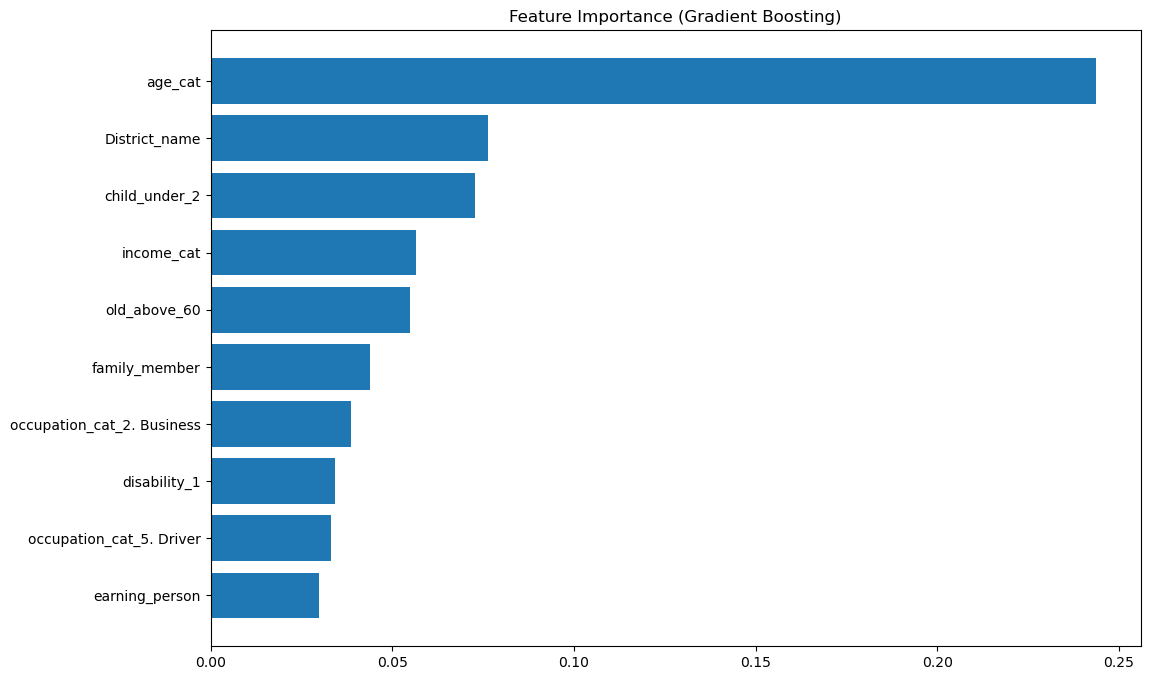

Top 10 Most Important Features:
           Feature  Random Forest Importance  Gradient Boosting Importance
14         age_cat                  0.120694                      0.243815
0    District_name                  0.095511                      0.076459
5              _v7                  0.079957                      0.019695
15      income_cat                  0.077584                      0.056606
20    old_above_60                  0.047500                      0.055001
21  earning_person                  0.044515                      0.029880
19   child_under_2                  0.040921                      0.072687
18   family_member                  0.032662                      0.043765
13          _v61_1                  0.027589                      0.015554
46     _v55_1. Yes                  0.027486                      0.008051


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Function to plot feature importance
def plot_feature_importance(model, model_name, X_train, top_n=10):
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)[-top_n:]
    pos = np.arange(top_n) + 0.5
    plt.figure(figsize=(12, 8))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
    plt.title(f'Feature Importance ({model_name})')
    plt.show()

# Plot feature importance for Random Forest
plot_feature_importance(rf_model, 'Random Forest', X_train)

# Plot feature importance for Gradient Boosting
plot_feature_importance(gb_model, 'Gradient Boosting', X_train)

# Get the feature importance values
rf_feature_importance = rf_model.feature_importances_
gb_feature_importance = gb_model.feature_importances_

# Create a DataFrame to hold the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Random Forest Importance': rf_feature_importance,
    'Gradient Boosting Importance': gb_feature_importance
})

# Sort by Random Forest Importance
feature_importance_df = feature_importance_df.sort_values(by='Random Forest Importance', ascending=False)

# Display only the top 10 most important features
print("Top 10 Most Important Features:")
print(feature_importance_df.head(10))


logistic regression  Important Features

In [48]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model on the training set
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Extract the coefficients from the logistic regression model
coefficients = model.coef_[0]

# Calculate the feature importances based on the coefficients
feature_importances = np.abs(coefficients)

# Sort the features by their importances and print the top 10
top_10_indices = np.argsort(feature_importances)[-10:]
top_10_features = X.columns[top_10_indices]

print("Top 10 important features:")
for i, f in enumerate(top_10_features):
    print(f"{i+1}. {f}: {feature_importances[top_10_indices[i]]:.4f}")

Top 10 important features:
1. income_cat: 0.6734
2. _v44_0: 0.7215
3. _v41_2. No: 0.7300
4. _v46_2. No: 0.7961
5. occupation_cat_4. professional: 0.9731
6. child_under_2: 1.3453
7. _v45_1: 1.5985
8. _v45_0: 1.8226
9. age_cat: 2.3484
10. District_name: 2.5300


Random Forest Classifier for Feature Important 

In [47]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]

top_10_features = X_train.columns[indices]
print("Top 10 important features:")
for i, f in enumerate(top_10_features):
    print(f"{i+1}. {f}: {importances[indices[i]]:.4f}")

Top 10 important features:
1. _v61_0: 0.0272
2. _v61_1: 0.0282
3. family_member: 0.0336
4. child_under_2: 0.0403
5. earning_person: 0.0443
6. old_above_60: 0.0484
7. income_cat: 0.0761
8. _v7: 0.0807
9. District_name: 0.1049
10. age_cat: 0.1204
